<a href="https://colab.research.google.com/github/SzymonNowakowski/diffusions/blob/master/weight_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weight charts
### Author: Szymon Nowakowski



In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Linear interpolating schedule

$$
  \alpha_t = 1-t \\
  \sigma_t = t
$$

**Legend:** $\tilde\eta$ is the weight minimzer, while $\hat\eta^\pm$ are the two etas for which the weights are exactly twice the optimum. Note that both $w^\epsilon$ and $w^{X_0}$ have the same eta minimizer and twice-the-weight point.

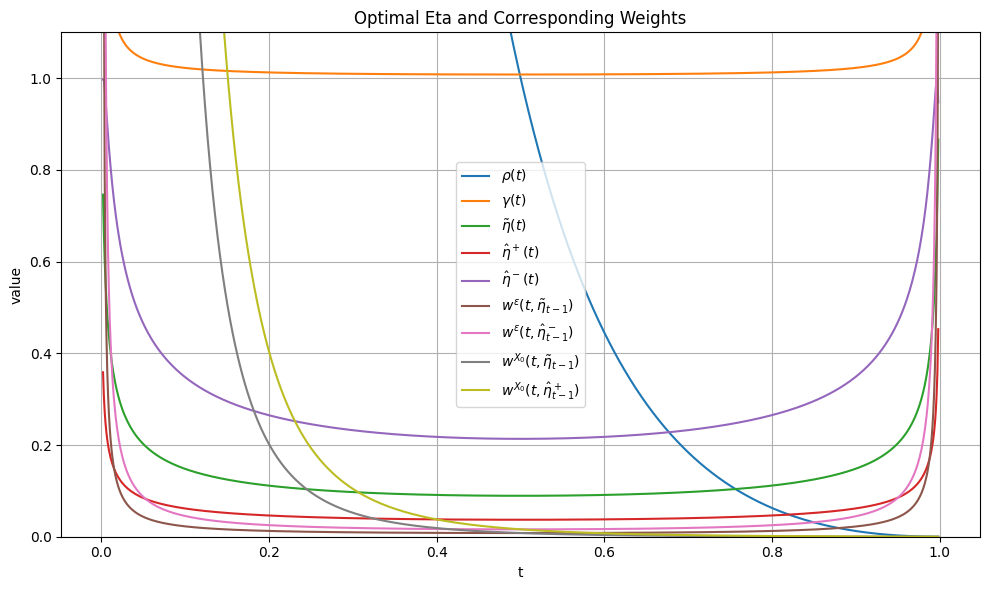

In [48]:
T = 1000
next_ind = lambda t: t+1/T
prev_ind = lambda t: t-1/T
alpha = lambda t: 1 - t
sigma = lambda t: t

rho = lambda t: (alpha(t)/sigma(t)) ** 2
gamma = lambda t: rho(t)/rho(next_ind(t))

eta_optim = lambda t: (1-1/gamma(t)) ** 0.5
weight_optim = lambda t: gamma(prev_ind(t)) - 1
weight_epsilon = lambda t, eta: rho(prev_ind(t))/eta**2 * (1/rho(prev_ind(t))**0.5 * (1-eta**2)**0.5- 1/rho(t)**0.5 )**2

weight_X0 = lambda t, eta: weight_epsilon(t, eta) * rho(t)

eta_twice_plus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) + np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)
eta_twice_minus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) - np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)



# Evaluation range
ts = np.linspace(0.002, 0.998, 1000)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts, rho(ts), label=r'$\rho(t)$')
plt.plot(ts, gamma(ts), label=r'$\gamma(t)$')
plt.plot(ts, eta_optim(ts), label=r'$\tilde \eta (t)$')
plt.plot(ts, eta_twice_plus(ts), label=r'$\hat \eta^+ (t)$')
plt.plot(ts, eta_twice_minus(ts), label=r'$\hat \eta^- (t)$')
#plt.plot(ts, weight_optim(ts), label=r'$w_{\text{optim}}(t)$')
plt.plot(ts, weight_epsilon(ts, eta_optim(prev_ind(ts))), label=r'$w^\epsilon(t, \tilde \eta_{t-1})$')
plt.plot(ts, weight_epsilon(ts, eta_twice_minus(prev_ind(ts))), label=r'$w^\epsilon(t, \hat \eta^-_{t-1})$')
plt.plot(ts, weight_X0(ts, eta_optim(prev_ind(ts))), label=r'$w^{X_0}(t, \tilde \eta_{t-1})$')
plt.plot(ts, weight_X0(ts, eta_twice_plus(prev_ind(ts))), label=r'$w^{X_0}(t, \hat \eta^+_{t-1})$')
plt.xlabel('t')
plt.ylabel('value')
plt.title('Optimal Eta and Corresponding Weights')
plt.ylim(0, 1.1)  # restrict y-axis range
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
for t in [0.1, 0.2, 0.5, 0.8, 0.9]:
  print("otimal_weight(%.1f)=%.4f with %.4f times minimum" % (t, weight_optim(t), weight_optim(t)/weight_optim(0.5)))

otimal_weight(0.1)=0.0226 with 2.8103 times minimum
otimal_weight(0.2)=0.0126 with 1.5690 times minimum
otimal_weight(0.5)=0.0080 with 1.0000 times minimum
otimal_weight(0.8)=0.0126 with 1.5631 times minimum
otimal_weight(0.9)=0.0224 with 2.7852 times minimum


# Sine/Cosine Variance Preserving Interpolator

$$
\alpha(t) = \cos\left( \frac{\pi}{2} t \right)
$$

$$
\sigma(t) = \sin\left( \frac{\pi}{2} t \right)
$$

$$
\alpha^2(t) + \sigma^2(t) = 1
$$

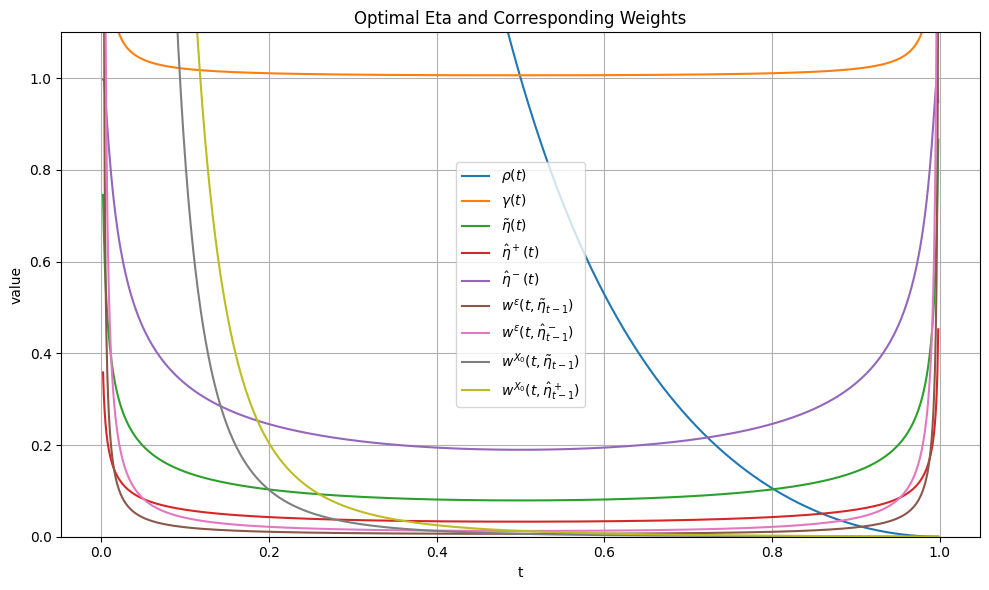

In [50]:
T = 1000
next_ind = lambda t: t+1/T
prev_ind = lambda t: t-1/T
alpha = lambda t: np.cos(t * np.pi / 2)
sigma = lambda t: np.sin(t * np.pi / 2)

rho = lambda t: (alpha(t)/sigma(t)) ** 2
gamma = lambda t: rho(t)/rho(next_ind(t))

eta_optim = lambda t: (1-1/gamma(t)) ** 0.5
weight_optim = lambda t: gamma(prev_ind(t)) - 1
weight_epsilon = lambda t, eta: rho(prev_ind(t))/eta**2 * (1/rho(prev_ind(t))**0.5 * (1-eta**2)**0.5- 1/rho(t)**0.5 )**2

weight_X0 = lambda t, eta: weight_epsilon(t, eta) * rho(t)

eta_twice_plus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) + np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)
eta_twice_minus = lambda t: np.sqrt(1 - (
    (np.sqrt(gamma(t)) - np.sqrt(gamma(t) - (2 * gamma(t) - 1) * (2 - gamma(t)))) / (2 * gamma(t) - 1)
)**2)



# Evaluation range
ts = np.linspace(0.002, 0.998, 1000)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ts, rho(ts), label=r'$\rho(t)$')
plt.plot(ts, gamma(ts), label=r'$\gamma(t)$')
plt.plot(ts, eta_optim(ts), label=r'$\tilde \eta (t)$')
plt.plot(ts, eta_twice_plus(ts), label=r'$\hat \eta^+ (t)$')
plt.plot(ts, eta_twice_minus(ts), label=r'$\hat \eta^- (t)$')
#plt.plot(ts, weight_optim(ts), label=r'$w_{\text{optim}}(t)$')
plt.plot(ts, weight_epsilon(ts, eta_optim(prev_ind(ts))), label=r'$w^\epsilon(t, \tilde \eta_{t-1})$')
plt.plot(ts, weight_epsilon(ts, eta_twice_minus(prev_ind(ts))), label=r'$w^\epsilon(t, \hat \eta^-_{t-1})$')
plt.plot(ts, weight_X0(ts, eta_optim(prev_ind(ts))), label=r'$w^{X_0}(t, \tilde \eta_{t-1})$')
plt.plot(ts, weight_X0(ts, eta_twice_plus(prev_ind(ts))), label=r'$w^{X_0}(t, \hat \eta^+_{t-1})$')
plt.xlabel('t')
plt.ylabel('value')
plt.title('Optimal Eta and Corresponding Weights')
plt.ylim(0, 1.1)  # restrict y-axis range
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
for t in [0.1, 0.2, 0.5, 0.8, 0.9]:
  print("otimal_weight(%.1f)=%.4f with %.4f times minimum" % (t, weight_optim(t), weight_optim(t)/weight_optim(0.5)))

otimal_weight(0.1)=0.0206 with 3.2750 times minimum
otimal_weight(0.2)=0.0108 with 1.7088 times minimum
otimal_weight(0.5)=0.0063 with 1.0000 times minimum
otimal_weight(0.8)=0.0107 with 1.7014 times minimum
otimal_weight(0.9)=0.0204 with 3.2431 times minimum
